## XgboostBaseModel

In [6]:
import os, sys

sys.path.insert(0, os.path.abspath("../.."))

In [7]:
from models.xgboost import XgboostBaseModel
from lib.data_splitter import split_features_and_target_into_train_and_test_set
from lib.data_util import load_candlesticks
import pandas as pd

In [8]:
candlesticks = load_candlesticks("BTCUSDT", "1h", custom_data_path="../../tmp")
model = XgboostBaseModel()

features = pd.DataFrame(index=candlesticks.index)
features = model.generate_features(candlesticks, features)
target = model.generate_target(candlesticks, features)

In [9]:
(
    training_set_features,
    training_set_targets,
    test_set_features,
    test_set_targets,
) = split_features_and_target_into_train_and_test_set(features, {0: target}, 20)

RMSE: 0.682584
kfold Accuracy: -98.22% (17.61%)


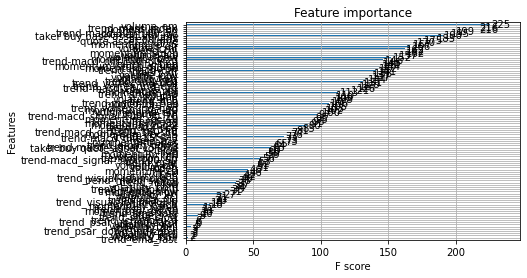

In [10]:
model.train(training_set_features, training_set_targets[0])
model.evaluate(test_set_features, test_set_targets[0])

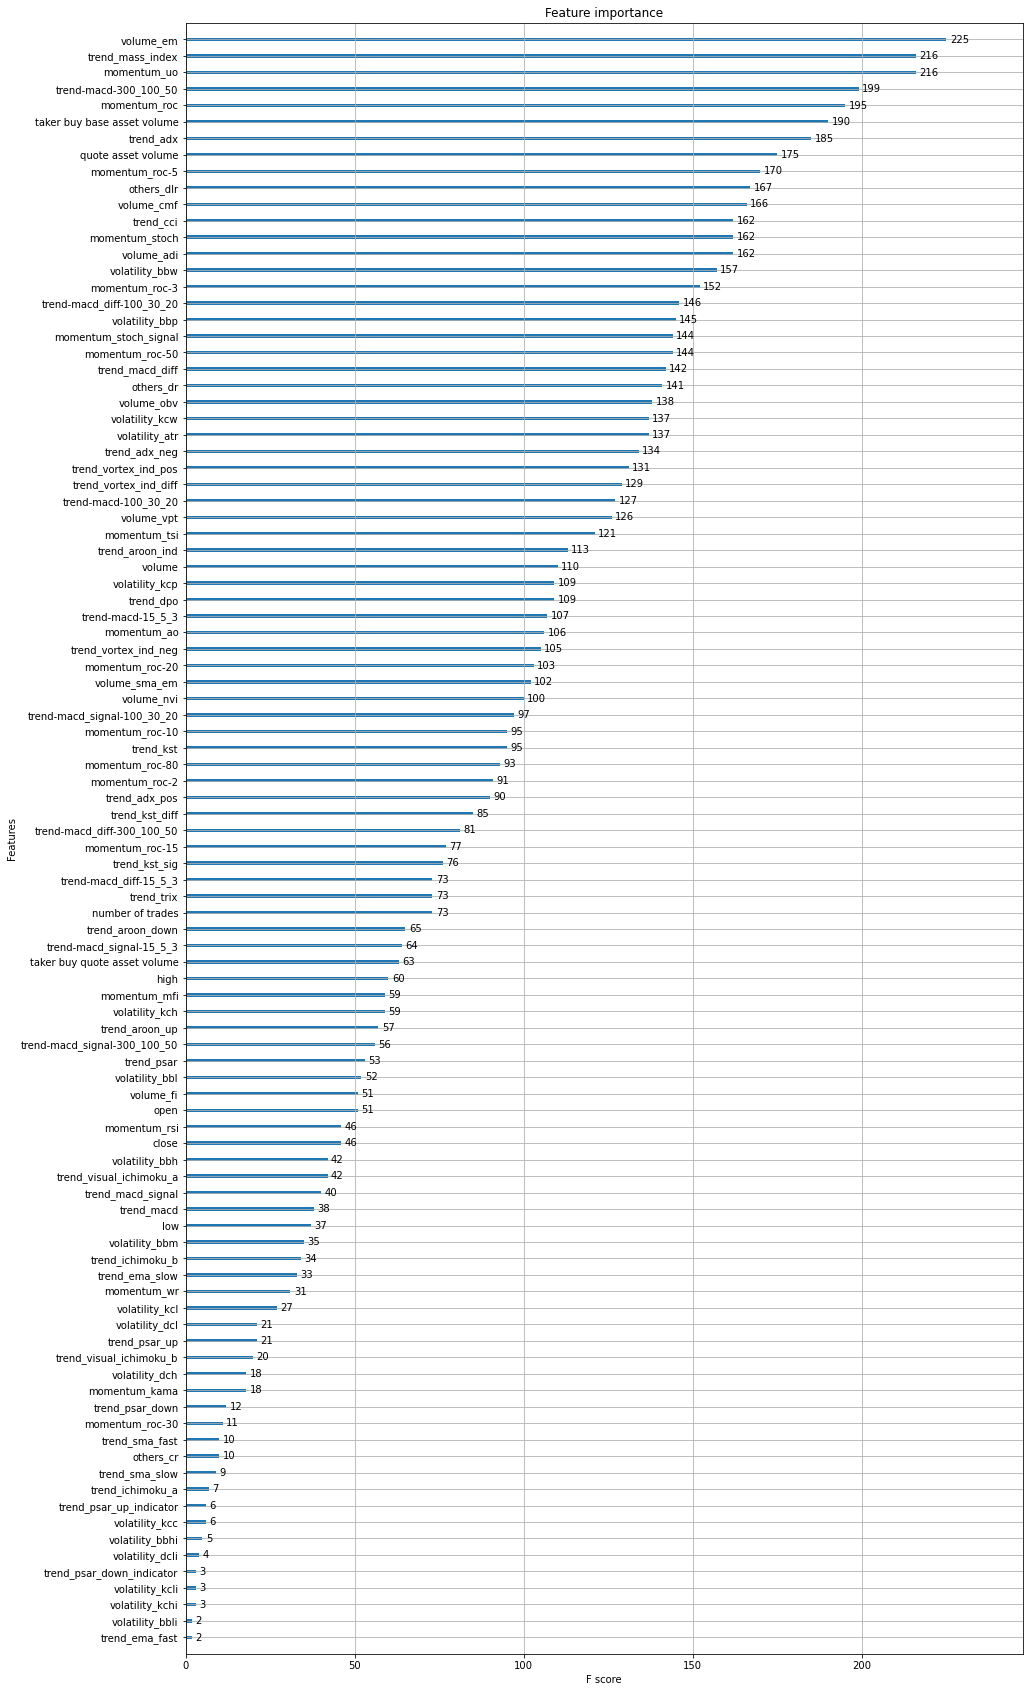

In [11]:
model.print_info()